##### Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location  
 Competitor Price -- Price charged by competitor at each location  
 Income -- Community income level (in thousands of dollars)  
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)  
 Population -- Population size in region (in thousands)  
 Price -- Price company charges for car seats at each site  
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  
 Age -- Average age of the local population  
 Education -- Education level at each location  
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not  
The company dataset looks like this:   
 
##### Problem Statement:  
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.   
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.    

##### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df = df.dropna()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


##### Checking the shape of the dataset

In [4]:
df.shape

(400, 11)

##### Checking for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


##### Checking for duplicated values

In [6]:
df[df.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


##### Checking for outliers using boxplot

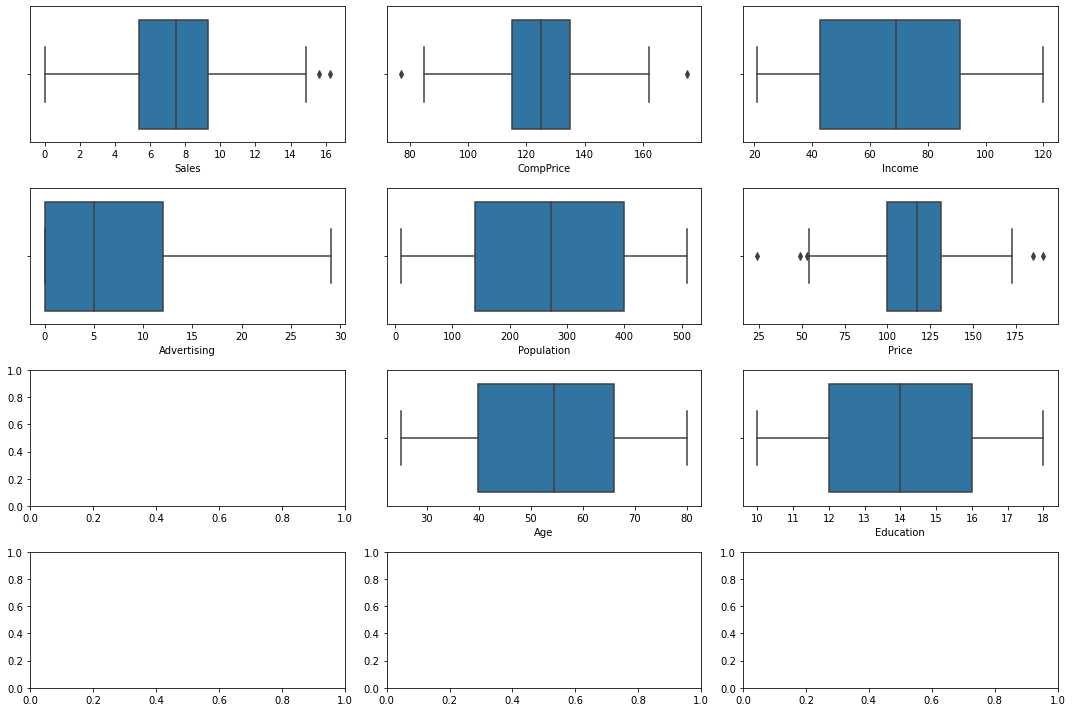

In [8]:
fig, ax = plt.subplots(4, 3, figsize = (15,10))

sns.boxplot(df.Sales, ax = ax[0, 0])
sns.boxplot(df.CompPrice, ax = ax[0, 1])
sns.boxplot(df.Income, ax = ax[0, 2])
sns.boxplot(df.Advertising, ax = ax[1, 0])
sns.boxplot(df.Population, ax = ax[1, 1])
sns.boxplot(df.Price, ax = ax[1, 2])
sns.boxplot(df.Age, ax = ax[2, 1])
sns.boxplot(df.Education, ax = ax[2, 2])

plt.tight_layout()
plt.show()

- Take high sales above at 7.49 beacause it is the mean of sales

In [9]:
df['sales'] = (df['Sales'] > 7.49)*1

##### Find the outliers in each of the column

In [10]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

Sales :  (array([316, 376], dtype=int64),)
CompPrice :  (array([ 42, 310], dtype=int64),)
Income :  (array([], dtype=int64),)
Advertising :  (array([], dtype=int64),)
Population :  (array([], dtype=int64),)
Price :  (array([ 42, 125, 165, 174, 367], dtype=int64),)
Age :  (array([], dtype=int64),)
Education :  (array([], dtype=int64),)


##### Checking the skewness and kurtosis

In [11]:
col = df.select_dtypes(exclude = 'object').columns.tolist()

data = df[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,sales
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007,0.010038
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332,-2.009974


##### Encode columns into numeric

In [12]:
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,255,49,51,11,141,54,0,17,7,1,1,1
1,297,22,27,16,129,18,1,40,0,1,1,1
2,267,24,14,10,138,15,2,34,2,1,1,1
3,158,28,77,4,249,31,2,30,4,1,1,0
4,37,52,42,3,178,62,0,13,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,320,49,85,17,104,62,1,8,4,1,1,1
396,114,50,2,3,17,54,2,30,1,0,1,0
397,159,71,5,12,195,91,2,15,8,1,1,0
398,106,12,57,7,145,29,0,25,2,1,1,0


##### Correlation

In [14]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12, 10 ))
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    _ = sns.heatmap(corr, cmap = cmap, square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True, annot_kws = {'fontsize' : 12})

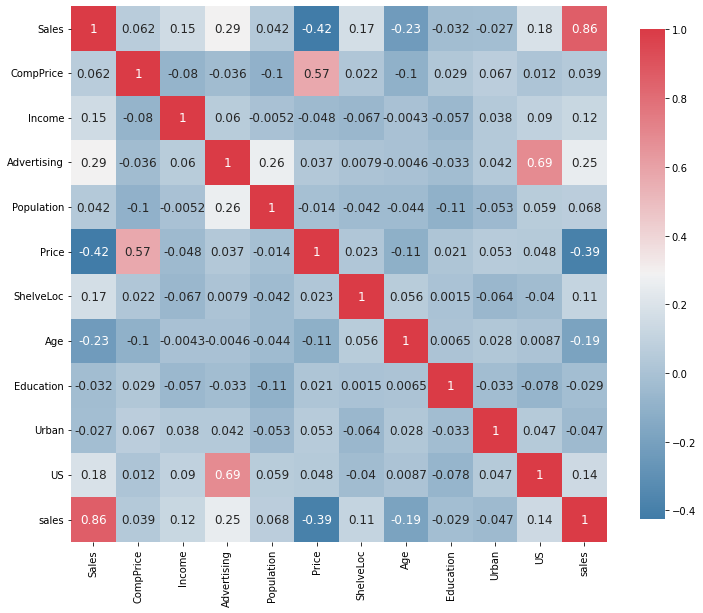

In [15]:
plot_correlation_map(df)

In [16]:
df.shape

(400, 12)

In [17]:
array = df.values
array

array([[255,  49,  51, ...,   1,   1,   1],
       [297,  22,  27, ...,   1,   1,   1],
       [267,  24,  14, ...,   1,   1,   1],
       ...,
       [159,  71,   5, ...,   1,   1,   0],
       [106,  12,  57, ...,   1,   1,   0],
       [262,  45,  16, ...,   1,   1,   1]], dtype=int64)

In [18]:
x = array[:, 1:11]
y = array[:, 11]

##### Bagging

In [19]:
kfold = KFold(n_splits = 10, random_state = 10, shuffle = True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = 20, random_state = 7)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.8125


##### Random Forest Classification

In [20]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.8074999999999999


##### AdaBoost Classification

In [21]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = AdaBoostClassifier(n_estimators = 10, random_state = 7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7699999999999999


##### Stacking Ensemble estimators for Classification

In [22]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

##### Create the sub models

In [23]:
estimators = []

model1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

##### Create the ensemble model

In [24]:
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7775000000000001


In [25]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]